In [19]:
#Імпорт необхідних бібліотек
import numpy as nmp
import pandas as pnd
import matplotlib.pyplot as ppl
import seaborn as sbn
import statsmodels.api as stm
import warnings as warn

from sklearn.datasets import make_regression as mkr
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.linear_model import LinearRegression as lrg
from sklearn.preprocessing import StandardScaler as sts
from sklearn.preprocessing import LabelEncoder as lbe

from statsmodels.tsa.stattools import adfuller as adf
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from statsmodels.tsa.arima.model import ARIMA as AR
from statsmodels.graphics.tsaplots import plot_acf as pla

from math import sqrt

from pmdarima import auto_arima as auar

    MSE: 180.64
    R^2: 0.99


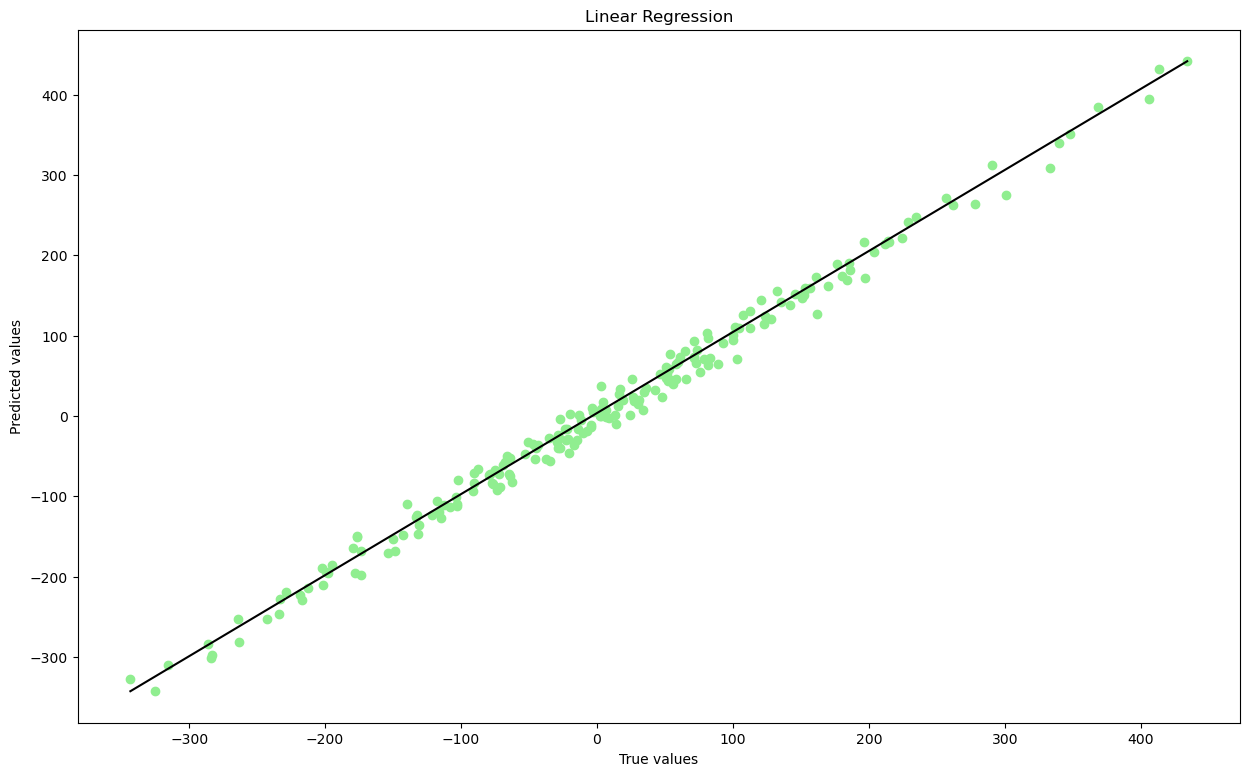

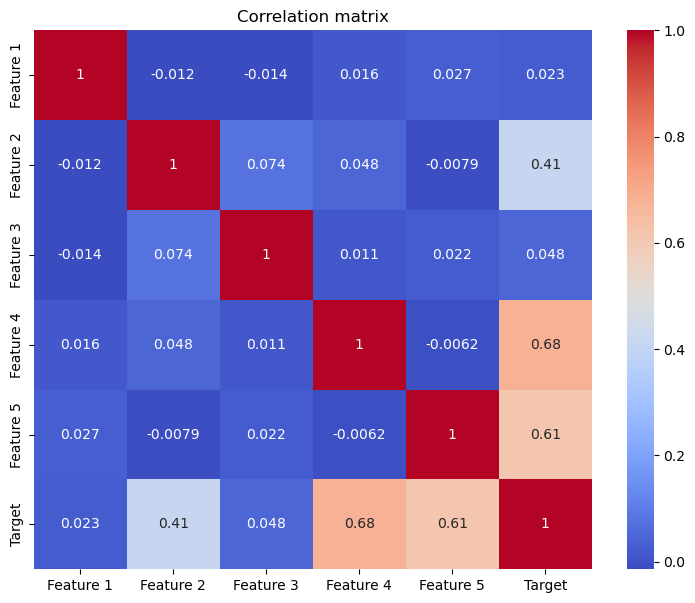

In [20]:
#Частина 1
#Генерація данних
x, y = mkr(
    n_samples=1000,
    n_features=5,
    n_informative=3,
    noise=13,
    random_state=13
)
dataf = pnd.DataFrame(data=x, columns=[f'Feature {i+1}' for i in range(5)])
dataf['Target'] = y
dataf.to_csv('Part1_Data.csv', index=False)
#Розділення данних
data = pnd.read_csv('Part1_Data.csv')
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.2, random_state=3)
#Побудова моделі лінійної регресії
lr = lrg()
lr.fit(xtrain, ytrain)
pred = lr.predict(xtest)
#Оцінка точності
print(f'    MSE: {mse(ytest, pred):.2f}')
print(f'    R^2: {r2(ytest, pred):.2f}')
#Візуалізація результатів
ppl.figure(figsize=(15,9))
ppl.scatter(ytest, pred, color='lightgreen')
ppl.plot([min(ytest), max(ytest)], [min(pred), max(pred)], linestyle='-', color='black')
ppl.xlabel('True values')
ppl.ylabel('Predicted values')
ppl.title('Linear Regression')
ppl.show(close=None, block=None)
cormatr = data.corr()
ppl.figure(figsize=(9,7))
sbn.heatmap(cormatr, annot=True, cmap='coolwarm')
ppl.title('Correlation matrix')
ppl.show(close=None, block=None)

Metric results are good: MSE = 180.64, R^2 = 0.99. Moreover, according to the graph, most of the predicted values ​​lie on the same line.Therefore, it can be concluded that this model is quite qualitative and able to predict the value quite accurately.

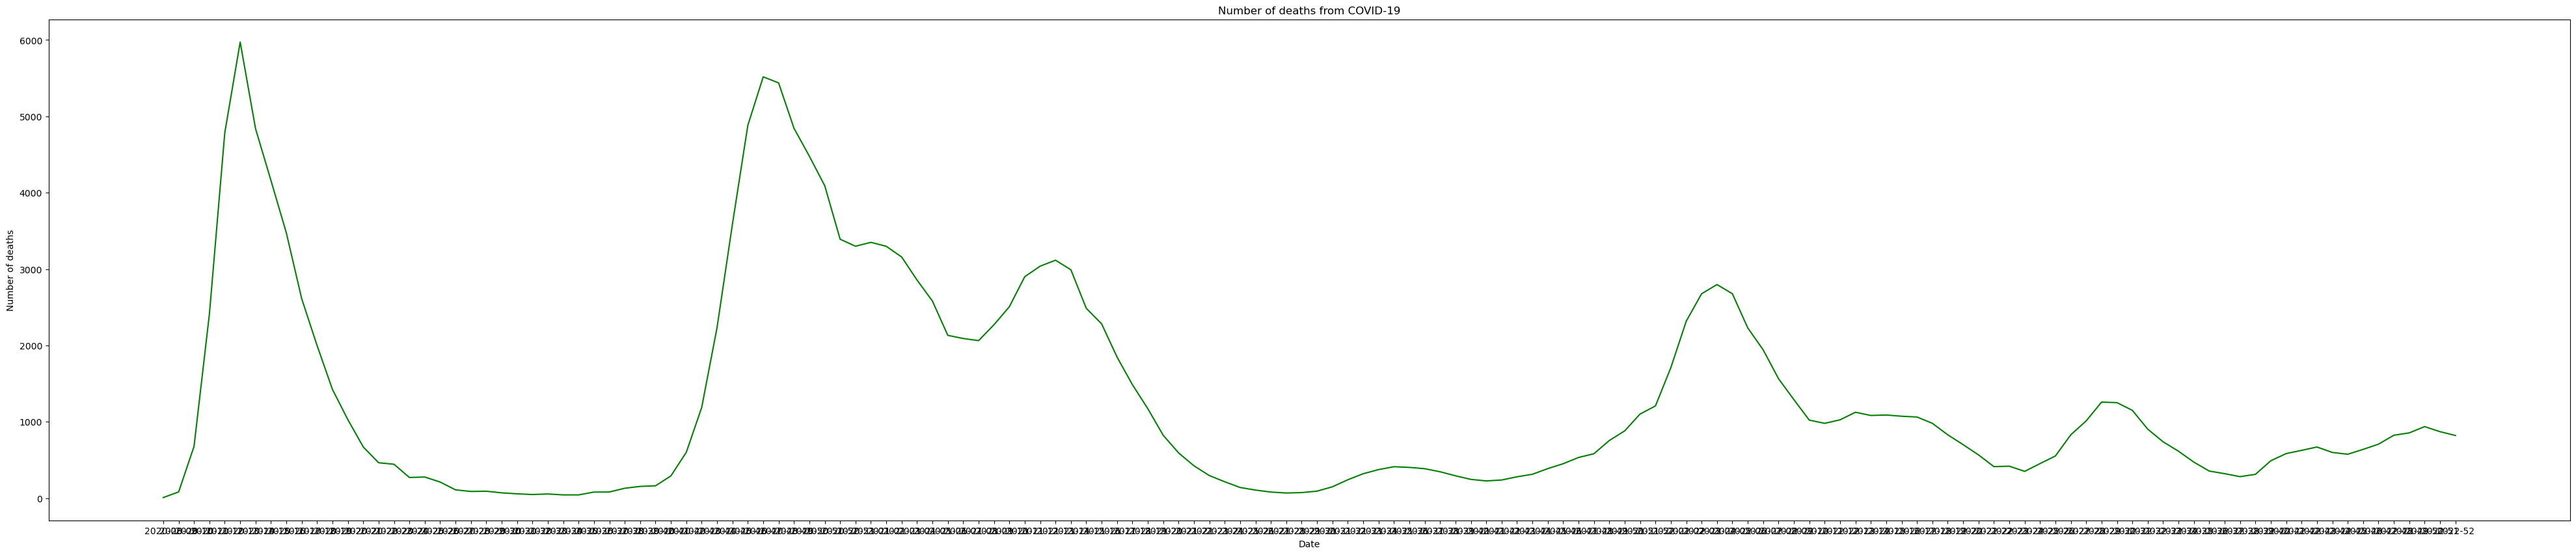

ADF Stat: -3.55
P-value: 0.01
Critical values: 
1%: -3.48
5%: -2.88
10%: -2.58


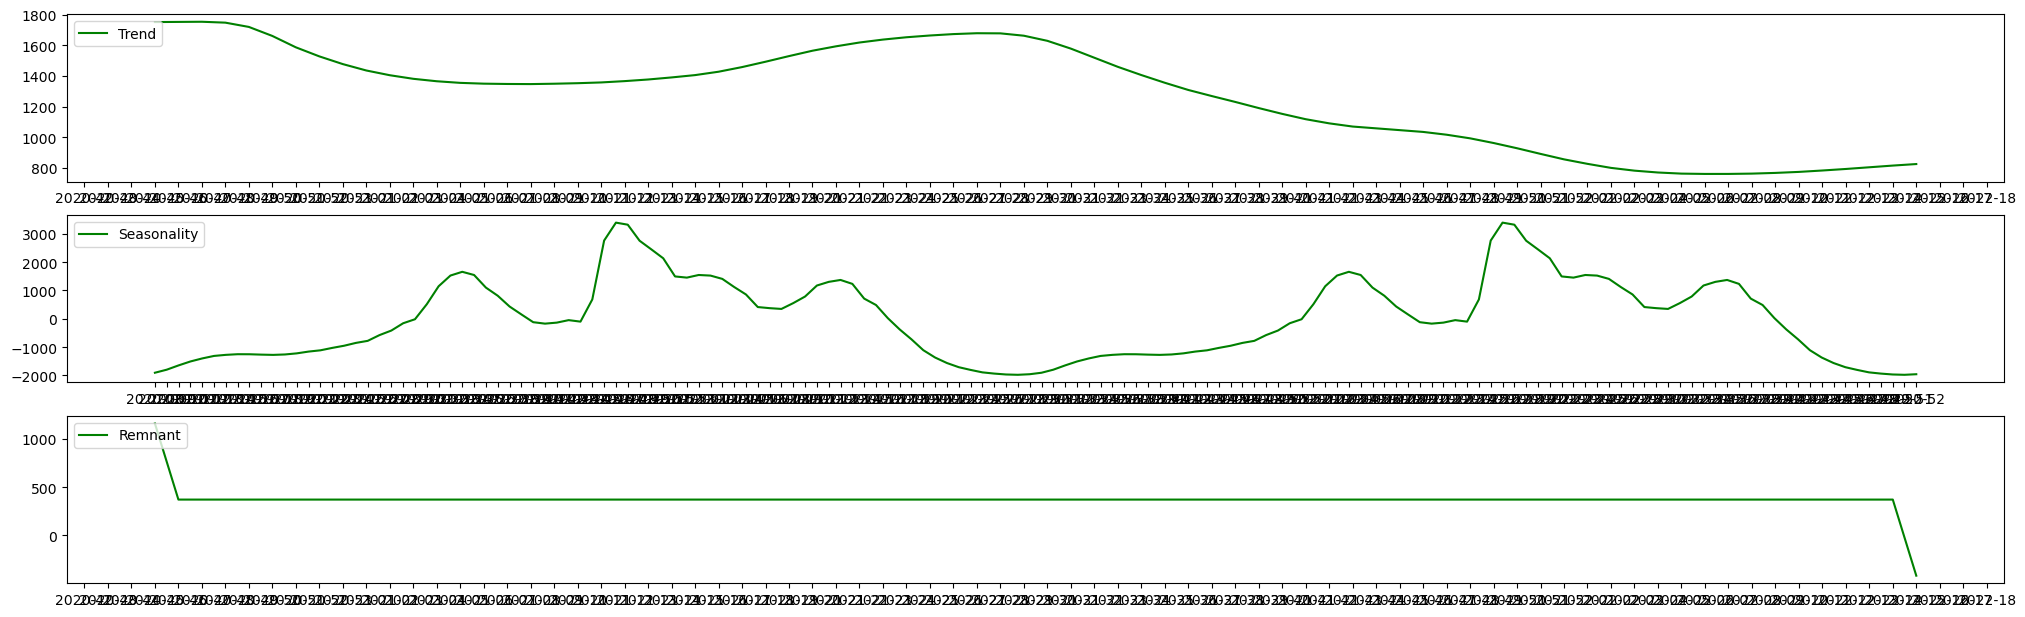

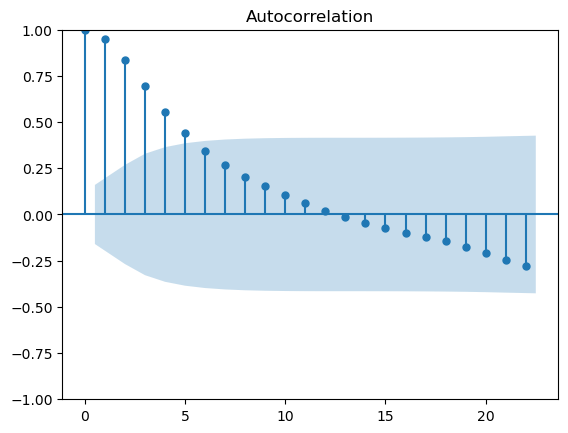

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2086.573, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2592.997, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2233.106, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2687.596, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2098.222, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2085.030, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2127.812, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2099.742, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2086.500, Time=0.27 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2085.283, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2088.412, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2091.384, Time=0.05 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 1.666 seconds


In [21]:
#Частина 2
#Завантаження данних
dat = pnd.read_csv('CovidM.csv', parse_dates=['Yearweek'], index_col='Yearweek')#Кількість смертей від COVID-19 в Італії
#Візуалізація
ppl.figure(figsize=(50, 10))
ppl.plot(dat.index, dat['Number of deaths'], label='Number of deaths', color='green')
ppl.title('Number of deaths from COVID-19')
ppl.xlabel('Date')
ppl.ylabel('Number of deaths')
ppl.show(close=None, block=None)
#Перевірка стаціонарності
adst = adf(dat)
print(f'ADF Stat: {adst[0]:.2f}')
print(f'P-value: {adst[1]:.2f}')
print('Critical values: ')
for k, val in adst[4].items():
    print(f'{k}: {val:.2f}')
#Розділення на тренд, сезонність та залишкові та візуалізація
dec = sd(dat, model='additive', period=75)
trendd = dec.trend
seasonn = dec.seasonal
rest = dec.resid
ppl.figure(figsize=(25, 10))
ppl.subplot(411)
ppl.plot(trendd, label='Trend', color='green')
ppl.legend(loc='upper left')
ppl.subplot(412)
ppl.plot(seasonn, label='Seasonality', color='green')
ppl.legend(loc='upper left')
ppl.subplot(413)
ppl.plot(rest, label='Remnant', color='green')
ppl.legend(loc='upper left')
ppl.show(close=None, block=None)
pla(dat)
ppl.show(close=None, block=None)
#Підбір параметрів для ARIMA і прогноз для 35 тижнів 2023 року
warn.filterwarnings("ignore")
par = auar(dat['Number of deaths'], trace=True, suppress_warnings=True)
arm = AR(dat, order=(2, 0, 1))
ar = arm.fit()
futweeks = {'2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2023-13', '2023-14', '2023-15', '2023-16', '2023-17', '2023-18', '2023-19', '2023-20', '2023-21', '2023-22', '2023-23', '2023-24', '2023-25', '2023-26', '2023-27', '2023-28', '2023-29', '2023-30', '2023-31', '2023-32', '2023-33', '2023-34', '2023-35'}
pred = ar.predict(start=len(dat), end=len(dat)+34, typ='levels').rename('')
pred.index=futweeks

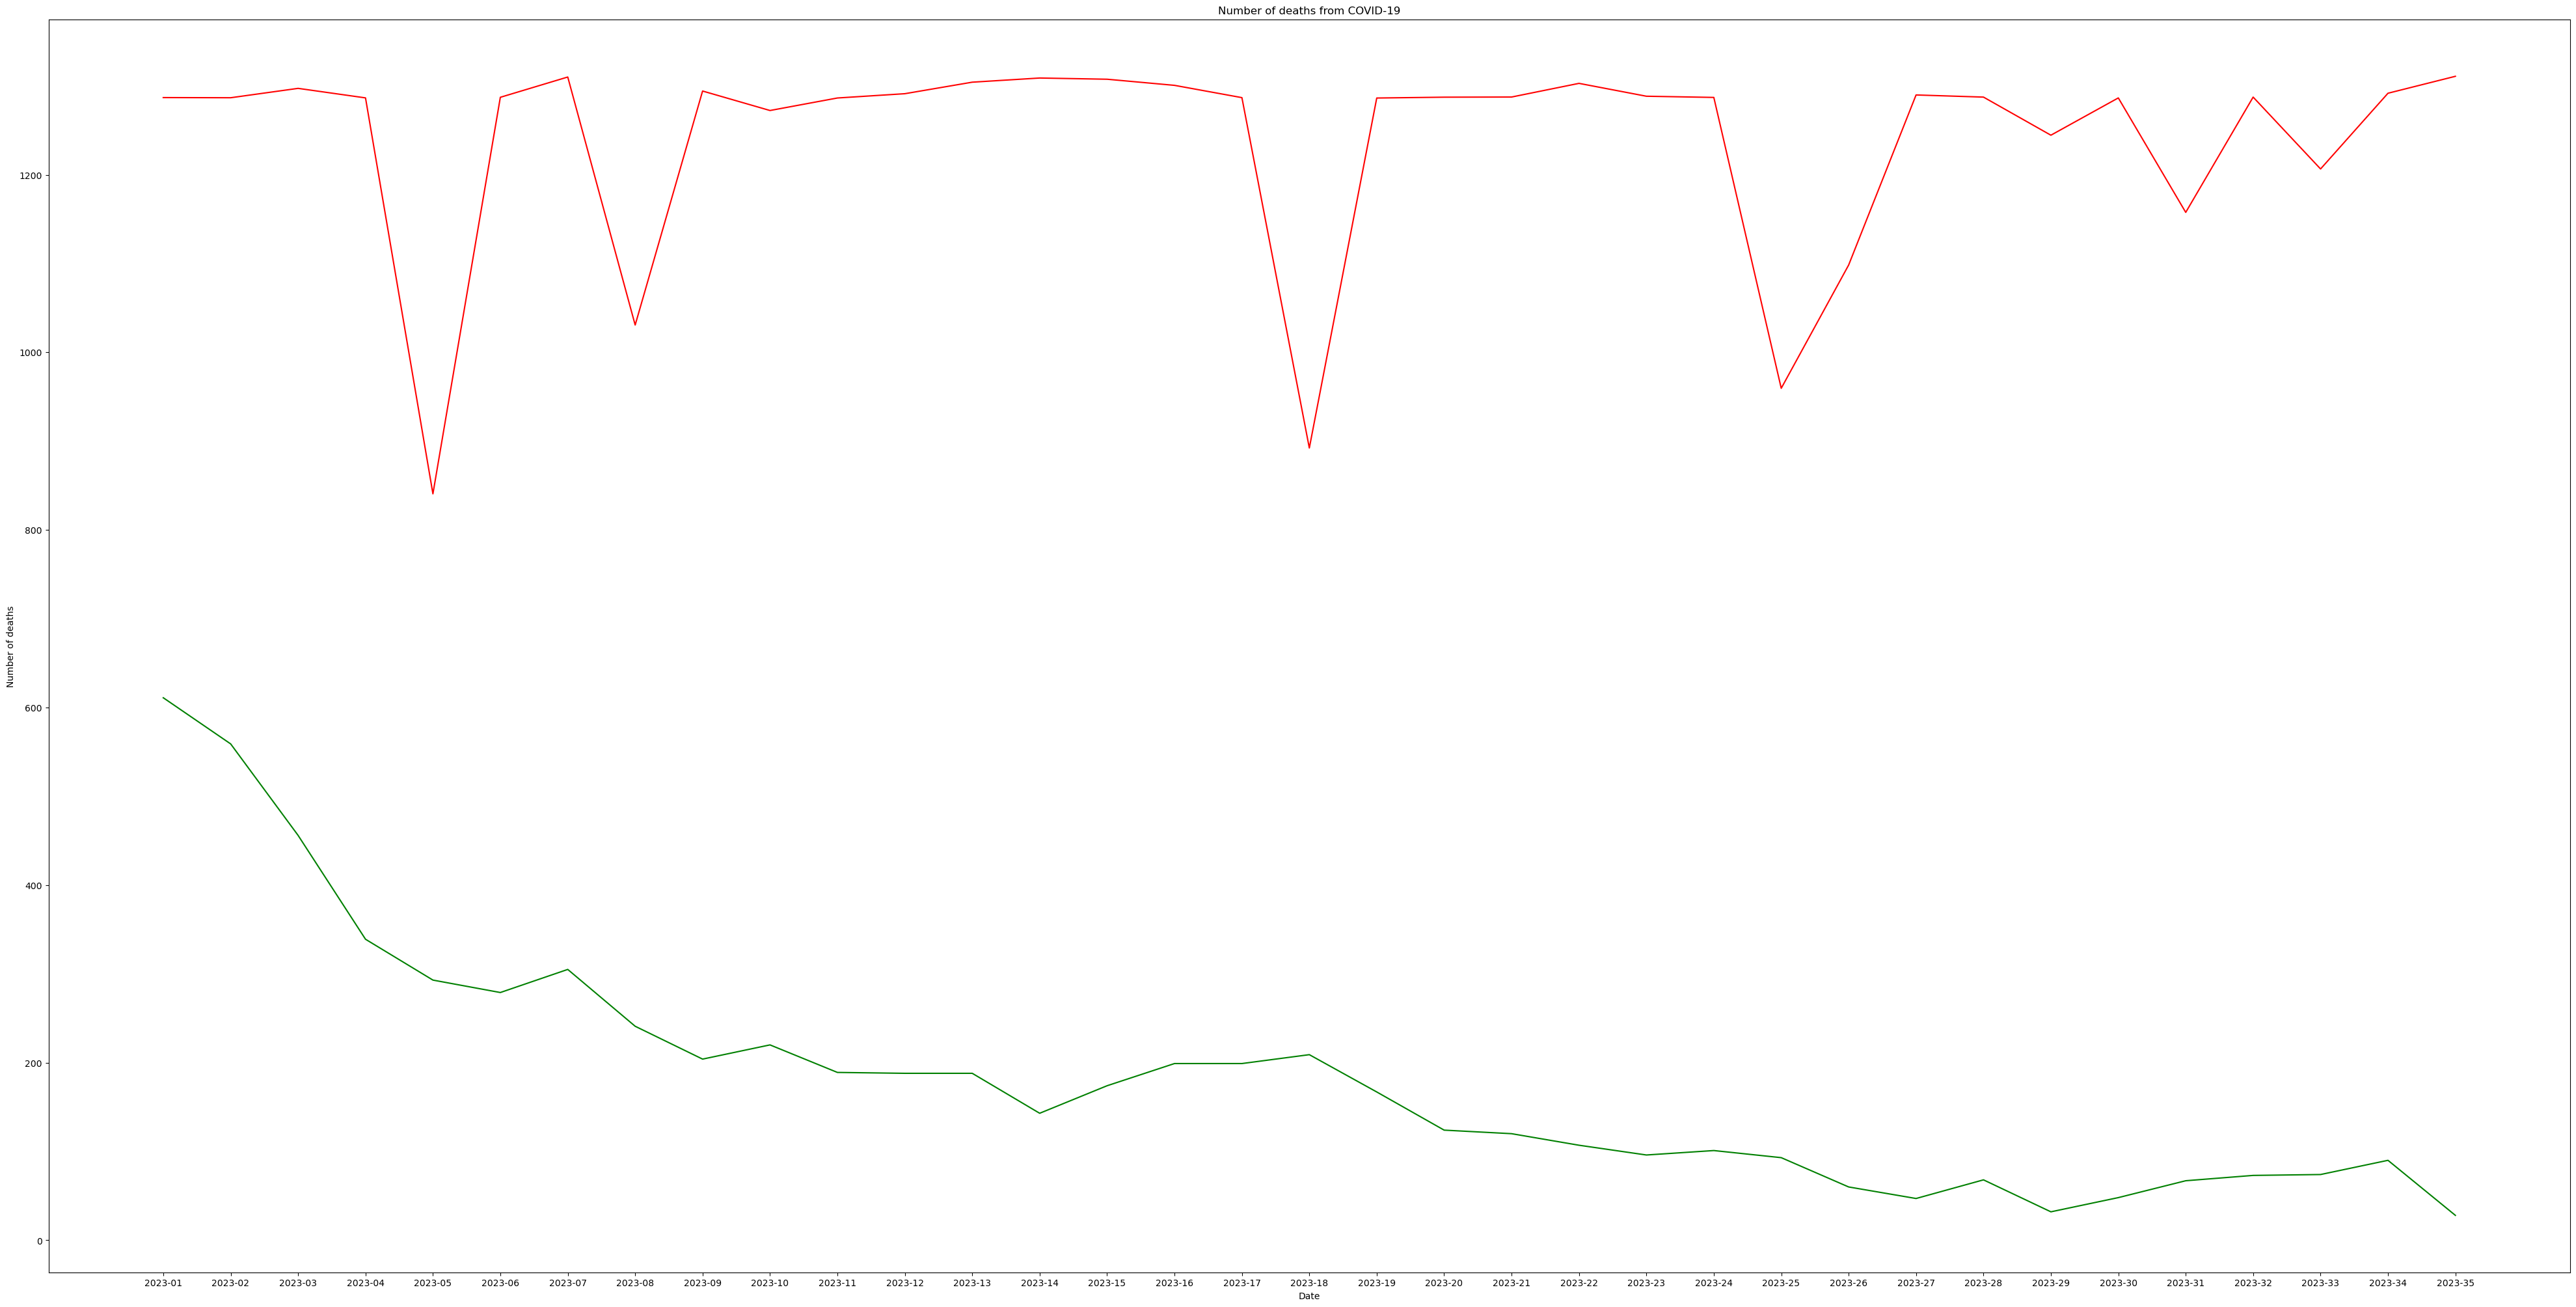

In [22]:
#Візуалізація прогнозованих і реальних даних для 35 тижнів 2023 року
data2 = pnd.read_csv('CovidM-2023.csv', parse_dates=['Yearweek'], index_col='Yearweek')
data1 = pnd.read_csv('Predicted.csv', parse_dates=['Yearweek'], index_col='Yearweek')
ppl.figure(figsize=(50, 25))
ppl.plot(data2.index, data2['Number of deaths'], label='Number of deaths', color='green')
ppl.plot(data1.index, data1['Number of deaths'], label='Number of deaths', color='red')
ppl.title('Number of deaths from COVID-19')
ppl.xlabel('Date')
ppl.ylabel('Number of deaths')
ppl.show(close=None, block=None)

Predictions for time-dependent data are only somewhat clear for the first few time slices. Although, looking at the graph comparing the forecasted and actual data for the 35 weeks of 2023, it can be said that this will not always be the case, since without a clear downward trend, the forecasted data may be higher than the actual.

    MSE: 618140543.07
    R^2: 0.89


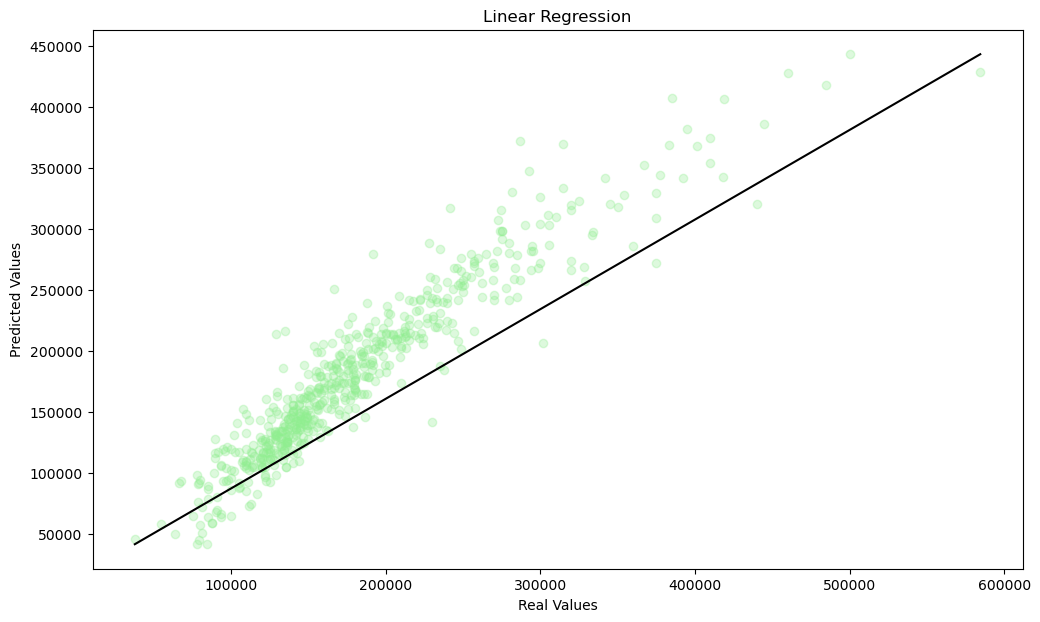

In [23]:
#Частина 3
#Завантаження данних і вибір цільової змінної
dataa = pnd.read_csv('AmesHousing.csv')
x_ = dataa.drop(['SalePrice'], axis=1)
y_ = dataa['SalePrice']
#Застосування LabelEncoder до стовпців категорій, обробка відсутніх значень і розділення данних
label_encoder = lbe()
for column in x_.select_dtypes(include=['object']).columns:
    x_[column] = label_encoder.fit_transform(x_[column])
x_.fillna(x_.mean(), inplace=True)
x_train, x_test, y_train, y_test = tts(x_, y_, test_size=0.2, random_state=3)
scal = sts()
x_trains = scal.fit_transform(x_train)
x_tests = scal.transform(x_test)
#Побудова моделі лінійної регресії
mdl = lrg()
mdl.fit(x_trains, y_train)
y_pred = mdl.predict(x_tests)
#Оцінка точності
print(f'    MSE: {mse(y_test, y_pred):.2f}')
print(f"    R^2: {r2(y_test, y_pred):.2f}")
#Візуалізація результатів
ppl.figure(figsize=(12, 7))
ppl.title('Linear Regression')
ppl.xlabel('Real Values')
ppl.ylabel('Predicted Values')
ppl.scatter(y_test, y_pred, c='lightgreen', alpha=0.3)
ppl.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], ls='-', c ='black')
ppl.show(close=None, block=None)

Metric results are not very good: MSE = 618140543.07, R^2 = 0.89. Moreover, according to the graph, most of the predicted values ​​lie outside the line.